### Homework #5
Data Science I  

The github repository link is: https://github.com/Creatran/Assignment5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Question 1: Use describe() to create a table that describes the price of AirBnBs in the 5 boroughs (the 5 neighbourhood groups). Which boroughs has the highest average price? The lowest average price? Do you see any potential outliers in the dataset?

In [2]:
listings = pd.read_csv("listings.csv")
listings.groupby("neighbourhood_group")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1048.0,86.532443,103.818430,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20019.0,124.182377,187.396430,0.0,60.0,90.0,149.0,10000.0
Manhattan,21790.0,197.523726,288.144597,0.0,95.0,150.0,220.0,10000.0
Queens,5588.0,98.272011,166.147723,10.0,50.0,73.0,110.0,10000.0
Staten Island,356.0,115.140449,284.291405,13.0,50.0,75.0,109.0,5000.0


As shown in the table, Manhattan has the highest average price (197.52), while Bronx has the lowest average price (86.53). The max prices(2500, 10000, 10000, 1000, and 5000) of these 5 boroughs are potential outliers since they are far higher than the average price and 75% quantile price.

Question 2: Make an ordered barplot of the median price in each borough.

Text(0, 0.5, 'Median price')

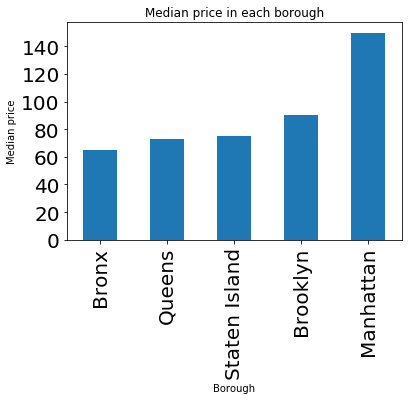

In [3]:
listings.groupby("neighbourhood_group")["price"].median().sort_values().plot(kind = "bar", fontsize = 20)
plt.title("Median price in each borough")
plt.xlabel("Borough")
plt.ylabel("Median price")

Question 3: Make an ordered barplot of the median prices for all of the neighbourhoods in the borough Manhattan. Which neighbourhood has the highest median price and what is this price?

Text(0, 0.5, 'Median price')

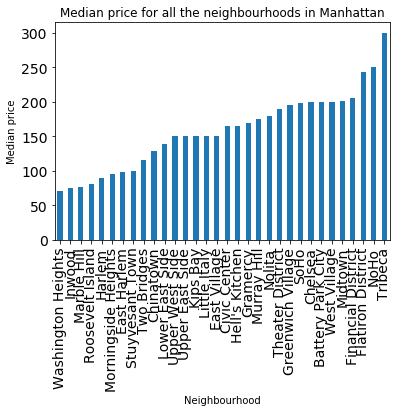

In [14]:
listings.Mannhattan = listings[listings.neighbourhood_group == "Manhattan"]
listings.Mannhattan.groupby("neighbourhood")["price"].median().sort_values().plot(kind = "bar", fontsize = 14)
plt.title("Median price for all the neighbourhoods in Manhattan")
plt.xlabel("Neighbourhood")
plt.ylabel("Median price")

In [15]:
listings.Mannhattan.groupby("neighbourhood")["price"].median().max()

300.0

Tribeca has the highest median price of 300.

Question 4: Make a barplot of the median prices in each bourough stratified by room type.

Text(0, 0.5, 'Median price')

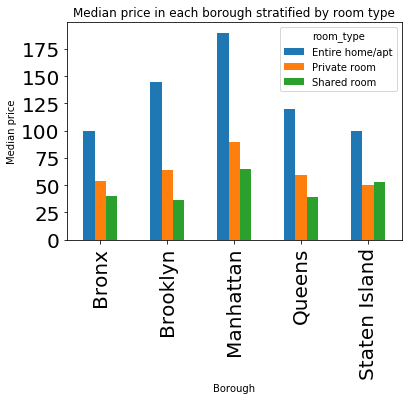

In [16]:
listings.groupby(["neighbourhood_group", "room_type"])["price"].median().unstack().plot(kind = "bar", fontsize = 20)
plt.title("Median price in each borough stratified by room type")
plt.xlabel("Borough")
plt.ylabel("Median price")

Question 5: Make a plot of the location (latitude and longtitude) of all of the AirBnB locations in New York city. Color the points in the plot by the bourough that the AirBnB belongs to. Make sure you have a legend identifying the colors of the bouroughs.

Text(0.5, 1.0, 'AirBnB locations in New York city')

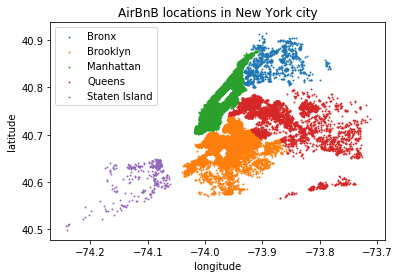

In [17]:
groups = listings.groupby('neighbourhood_group')
ax = plt.gca()

for lab, group in groups:
    ax.scatter(group.longitude, group.latitude, s = 0.8, marker = 'o', label = lab)
ax.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("AirBnB locations in New York city")


Question 6: Make a table of the percentage of AirBnBs that are of each room type by Bourough. Plot this table as a stacked barplot.

In [18]:
listings.count = listings.groupby(["neighbourhood_group", "room_type"]).size().groupby(level = 0).apply(
    lambda x: x/x.sum()).unstack()
listings.count

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.338740,0.606870,0.054389
Brooklyn,0.472751,0.506119,0.021130
Manhattan,0.612437,0.365489,0.022074
Queens,0.363815,0.602004,0.034180
Staten Island,0.457865,0.519663,0.022472


Text(0, 0.5, 'Percentage')

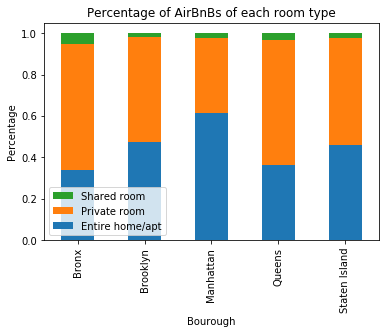

In [10]:
listings.count.plot(kind='bar',stacked=True,legend = False)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(current_handles), reversed(current_labels))
plt.title('Percentage of AirBnBs of each room type')
plt.xlabel('Bourough')
plt.ylabel('Percentage')

Question 7: Count the number of listings for each individual 'host_id'. Show that the answer you got is the same as the column 'calculated_host_listings_count' in the original data.

In [19]:
listings.count = listings.groupby(["host_id", 'calculated_host_listings_count']).size().reset_index(name = "count")
listings.count.head()

,host_id,calculated_host_listings_count,count
0,2420,1,1
1,2438,1,1
2,2571,1,1
3,2787,6,6
4,2845,2,2


In [7]:
sum(listings.count.calculated_host_listings_count - listings.count["count"])

0

The sum of the differences are equal to 0, so the count number for each individual 'host_id' is the same as the column 'calculated_host_listings_count' in the original data.

Question 8: Explore the listings for your favorite New York neighborhood. Make a crative visualization that includes that latitude, longitude, and price for the ArBnBs in that neighborhood. Filter out any outliers. Make histograms of the prices of AirBnBs for the neighborhood that are stratified by the room type.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


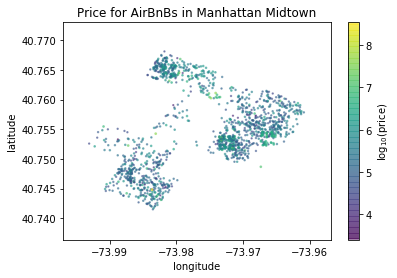

In [20]:
# I choose Midtown in Manhattan for exploration.
Midtown = listings[listings.neighbourhood_group == "Manhattan"][listings.neighbourhood == "Midtown"]
#Midtown
#Mannhattan.groupby("neighbourhood")["price"].median().sort_values().plot(kind = "bar", fontsize = 14)
plt.scatter(Midtown["longitude"], Midtown["latitude"],
           c = np.log(Midtown["price"]), alpha = .5, s = np.log10(Midtown['price']))
plt.title("Price for AirBnBs in Manhattan Midtown")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label = "log$_{10}$(price)")

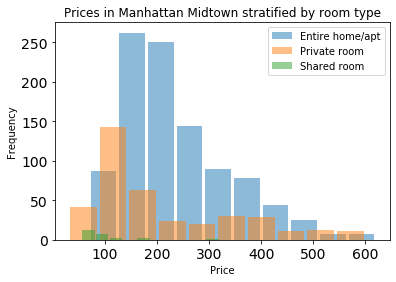

In [21]:
Q1, Q3 = np.percentile(Midtown['price'], [25, 75])
L1 = Q1 + (Q3 - Q1) * 1.5
Midtown[Midtown.price >= Q1 - (Q3 - Q1) * 1.5][Midtown.price <= Q3 + (Q3 - Q1) * 1.5].groupby('room_type')["price"].plot(kind = "hist", fontsize = 14, alpha = 0.5, rwidth = 0.9)
plt.title("Prices in Manhattan Midtown stratified by room type")
plt.xlabel('Price')
plt.legend()


Question 9: Read in 'listings_extended.csv'. Merge the dataset with 'listings.csv'. Now we have additional information about the listings, including the number of bedrooms that each listing has. Use the 'bedrooms' vaiable to make a plot of the number of bedrooms versus the median price stratified by borough. Filter out listings with more than 6 bedrooms for your plot (i.e. only go up to 6 bedrooms.)

In [22]:
listings_extended = pd.read_csv("listings_extended.csv")
listings_new = pd.merge(listings, listings_extended, on=["id", "neighbourhood"], how = 'left')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'Number of bedrooms versus the median price')

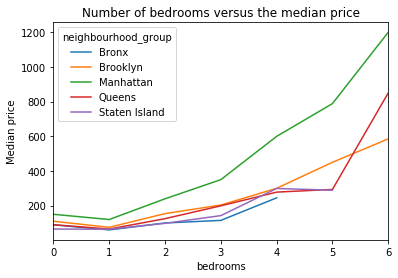

In [23]:
price_list = listings_new.groupby(["bedrooms", "neighbourhood_group"])['price_x'].median().unstack()
price_list[0 : 6].plot(kind = 'line')
plt.ylabel('Median price')
plt.title('Number of bedrooms versus the median price')


Question 10: The median price for zero bedroom listings appears to be higher than that of one bedroom listings. Why?

Text(0.5, 0, 'number of bedrooms')

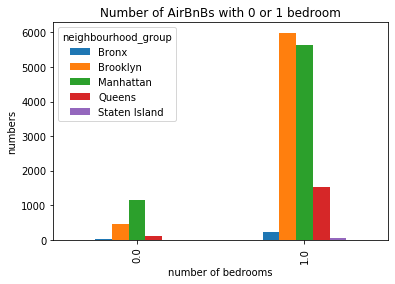

In [26]:
listings_new[listings_new.bedrooms <= 1].groupby(["bedrooms", "neighbourhood_group"])["neighbourhood_group"].count().unstack().plot(kind = "bar")
plt.title('Number of AirBnBs with 0 or 1 bedroom')
plt.ylabel('numbers')
plt.xlabel('number of bedrooms')

As shown in the bar plot, there are more houses with one bedroom than those with zero bedroom in all boroughs. So, 
the median price for zero bedroom might be higher due to rarity.

Question 11. Do ratings appear to impact the price of AirBnBs? Investigate if there is a relationship between the price of an AirBnB and the ratings that the AirBnB received. Use the variable 'review_score_rating' for the rating of the AirBnB.

Text(0.5, 1.0, 'Rate vesus log price')

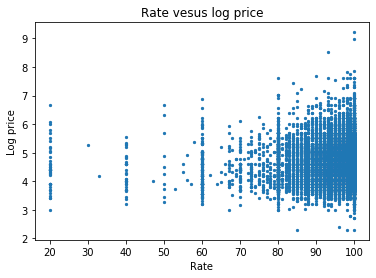

In [32]:
price_rate = listings_new[['id', "neighbourhood","neighbourhood_group","price_x", "review_scores_rating"]].dropna()
price_rate.columns = ['id', "neighbourhood","neighbourhood_group","price", "review_scores_rating"]

# scatter plot: log price by rate
plt.scatter(y = np.log(price_rate.price), x = price_rate.review_scores_rating, s = 5)
plt.xlabel('Rate')
plt.ylabel('Log price')
plt.title('Rate vesus log price')

First, take a look at the rate vesus price plot. There are more AirBnB houses with a higher rate. The log price has a wider spread when the rate is higher.

In [93]:
# calculate the median price for each neighbourhood and sort them by ratings.
price_by_neighbourhood = price_rate.groupby(["neighbourhood"])["price", "review_scores_rating"].median()
price_by_neighbourhood.sort_values(by=['review_scores_rating'])


,price,review_scores_rating
neighbourhood,,
Midland Beach,90.0,83.0
Arden Heights,75.0,84.0
Clifton,75.0,90.0
Holliswood,161.0,90.0
Port Richmond,50.0,91.0
...,...,...
Willowbrook,249.0,100.0
Oakwood,88.0,100.0
Breezy Point,195.0,100.0


Second, calculate the median price for each neighbourhood and sort them by ratings. As shown in the table, median ratings for each neighbourhood range from 83 to 100. However, median price for each neighbourhood does not have the same order with ratings. So, I calculated the median price and ratings for each boroughs.

In [92]:
# calculat the median price in each borough.
price_by_borough = price_rate.groupby(["neighbourhood_group"])["price", "review_scores_rating"].median()
price_by_borough

,price,review_scores_rating
neighbourhood_group,,
Bronx,62,96.0
Brooklyn,92,97.0
Manhattan,140,96.0
Queens,70,96.0
Staten Island,72,96.0


The median price seems quite close in each boroughs while the median price in Manhattan significantly higher than the others. To further investigate their relationship, I made a plot showing the median price vesus ratings stratified by boroughs.

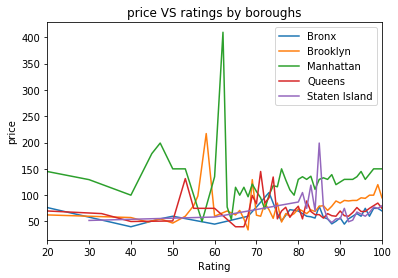

In [91]:
ax = plt.gca()
price_rate.groupby(["neighbourhood_group", 'review_scores_rating'])["price", "review_scores_rating"].median().groupby('neighbourhood_group').plot(x = 'review_scores_rating', y = 'price', ax = ax)
plt.xlabel('Rating')
plt.ylabel('price')
plt.title('price VS ratings by boroughs')
plt.legend(["Bronx", 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])

As shown in the plot, Manhattan has the highest price. Also, as ratings increase, the variability of price increase as well, which means that the spreads of price become wider at higher ratings. When the ratings are higher than 60, prices increase slightly as the ratings increase. It appears as though there exists a positive relationship between price and ratings when the ratings are higher than 60.